**Suraiya Nusrat Tanha**
**2021-2-60-030**

**Prinom Mojumder**
**2021-2-60-098**

**Tasnim Israk Synthia**
**2021-2-60-097**

# Dataset load

In [1]:
!pip install mrjob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 5.1 MB/s eta 0:00:00


**Dataset information**

In [2]:
!head -n 10 /content/retail_data.csv

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom


In [3]:
import pandas as pd

# Load the CSV file
retail_data = pd.read_csv('/content/retail_data.csv', encoding='latin-1')  # Adjust encoding if needed

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(retail_data.head())

# Display column names
print("\nColumn names:")
print(retail_data.columns)

# Display dataset shape (rows, columns)
print("\nDataset shape (rows, columns):")
print(retail_data.shape)

# Display data types of each column
print("\nData types of each column:")
print(retail_data.dtypes)

# Check for missing values in each column
print("\nMissing values in each column:")
print(retail_data.isnull().sum())

# Display a concise summary of the dataset
print("\nDataset info:")
print(retail_data.info())


First few rows of the dataset:
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1  536365     71053                  WHITE METAL LANTERN       6.0   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2010 8:26   2.55      17850.0  United Kingdom  
1  12/1/2010 8:26   3.39      17850.0  United Kingdom  
2  12/1/2010 8:26   2.75      17850.0  United Kingdom  
3  12/1/2010 8:26   3.39      17850.0  United Kingdom  
4  12/1/2010 8:26   3.39      17850.0  United Kingdom  

Column names:
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

Dataset shape (rows, columns):
(486625, 8)

Data types of 

# EDA

Transactions by Country & Monthly Transactions Over Time

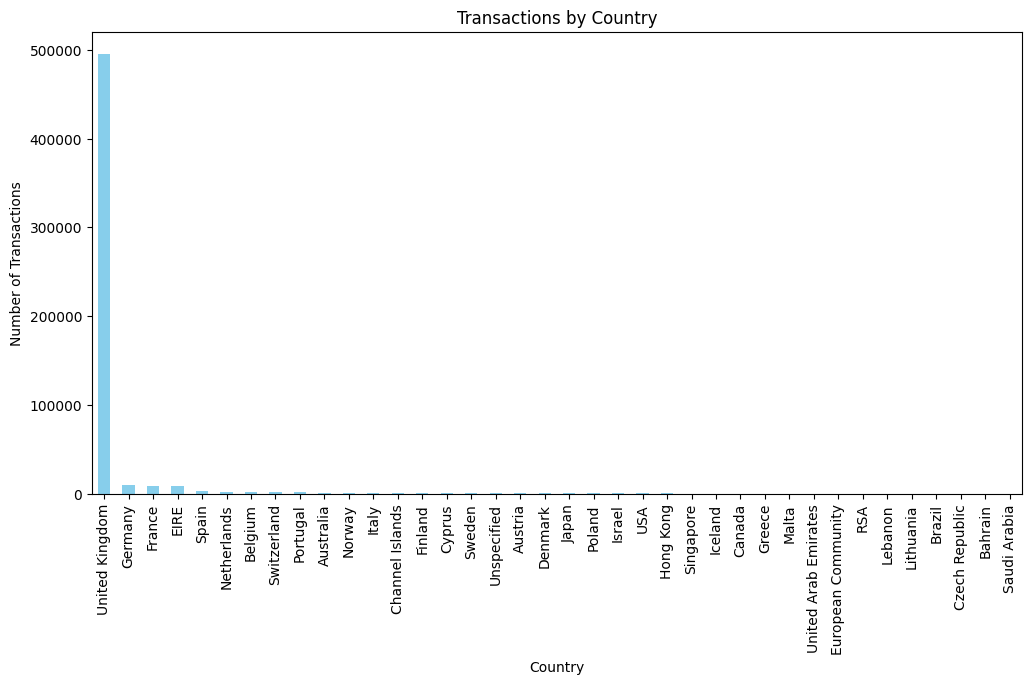

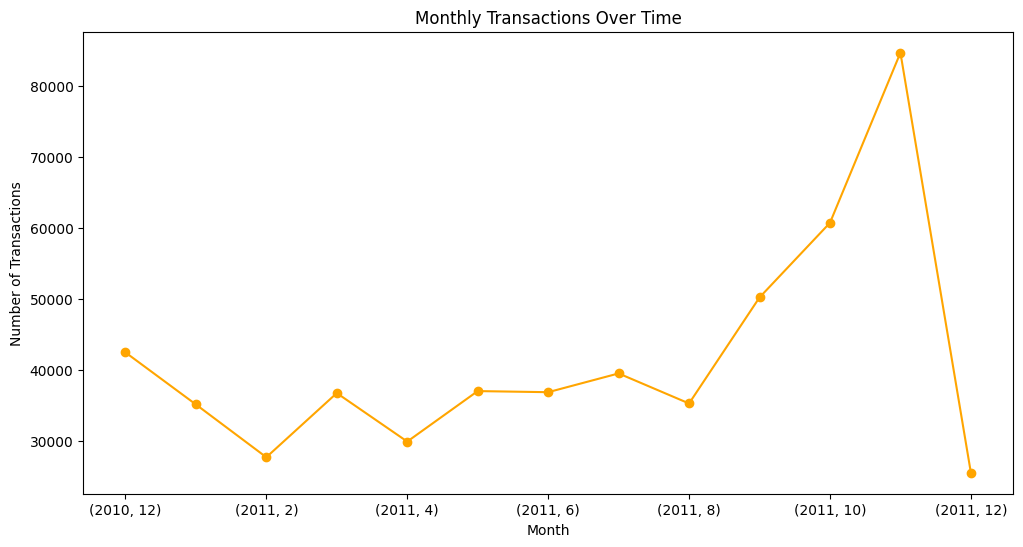

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
retail_data = pd.read_csv('/content/retail_data.csv', encoding='latin-1')

# 7. Sales by Country
if 'Country' in retail_data.columns:
    country_sales = retail_data['Country'].value_counts()
    plt.figure(figsize=(12, 6))
    country_sales.plot(kind='bar', color='skyblue')
    plt.title('Transactions by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Transactions')
    plt.show()

# 8. Temporal Analysis
# Ensure 'InvoiceDate' is in datetime format (adjust column name if needed)
if 'InvoiceDate' in retail_data.columns:
    retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], errors='coerce')

    # Extract year, month, and day
    retail_data['Year'] = retail_data['InvoiceDate'].dt.year
    retail_data['Month'] = retail_data['InvoiceDate'].dt.month
    retail_data['Day'] = retail_data['InvoiceDate'].dt.day

    # Transactions by month
    monthly_transactions = retail_data.groupby(['Year', 'Month']).size()
    monthly_transactions.plot(kind='line', marker='o', figsize=(12, 6), color='orange')
    plt.title('Monthly Transactions Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.show()



# 10. Top Products Analysis
# Ensure the columns 'Description', 'Quantity', and 'UnitPrice' exist
if 'Description' in retail_data.columns and 'Quantity' in retail_data.columns and 'UnitPrice' in retail_data.columns:
    retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']
    top_products = retail_data.groupby('Description').agg({
        'Quantity': 'sum',
        'TotalPrice': 'sum'
    }).sort_values('TotalPrice', ascending=False).head(10)

    print("\nTop 10 Products by Revenue:")
    print(top_products)

    top_products['TotalPrice'].plot(kind='barh', color='teal', figsize=(10, 6))
    plt.title('Top 10 Products by Revenue')
    plt.xlabel('Total Revenue')
    plt.ylabel('Product Description')
    plt.show()


Total Revenue by Country & Top 10 Products by Revenue


TotalRevenue column created.

Year, Month, DayOfWeek, and Hour columns created.

Revenue by Country:
Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197421.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                    

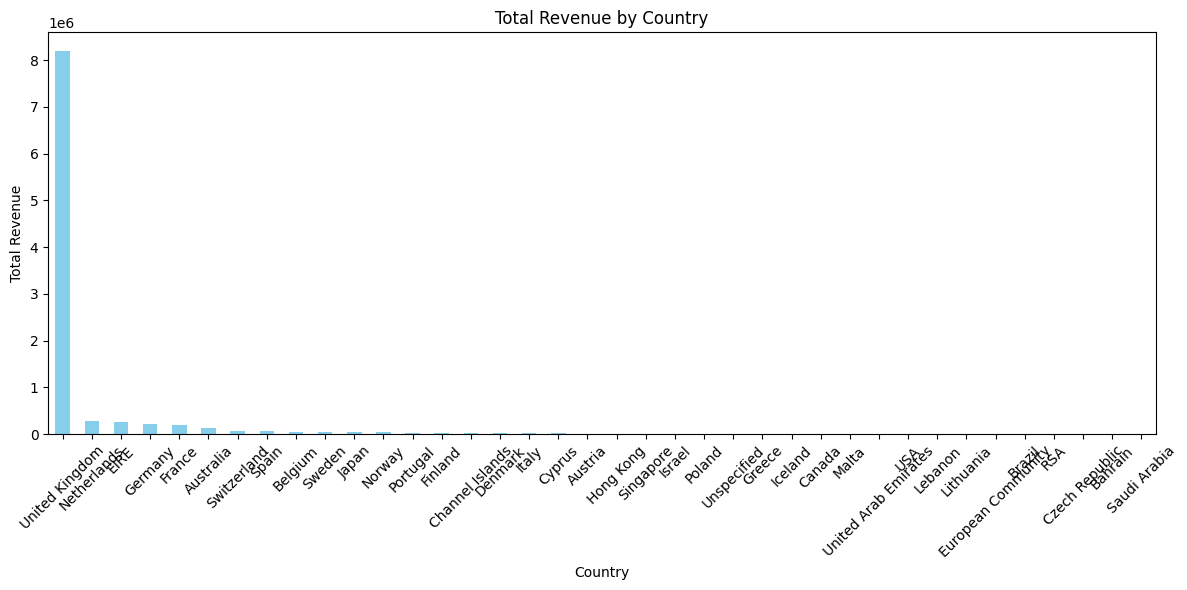


Top Products by Revenue:
                                    Quantity  TotalRevenue
Description                                               
DOTCOM POSTAGE                           707     206245.48
REGENCY CAKESTAND 3 TIER               13033     164762.19
WHITE HANGING HEART T-LIGHT HOLDER     35317      99668.47
PARTY BUNTING                          18022      98302.98
JUMBO BAG RED RETROSPOT                47363      92356.03
RABBIT NIGHT LIGHT                     30680      66756.59
POSTAGE                                 3004      66248.64
PAPER CHAIN KIT 50'S CHRISTMAS         18902      63791.94
ASSORTED COLOUR BIRD ORNAMENT          36381      58959.73
CHILLI LIGHTS                          10229      53768.06


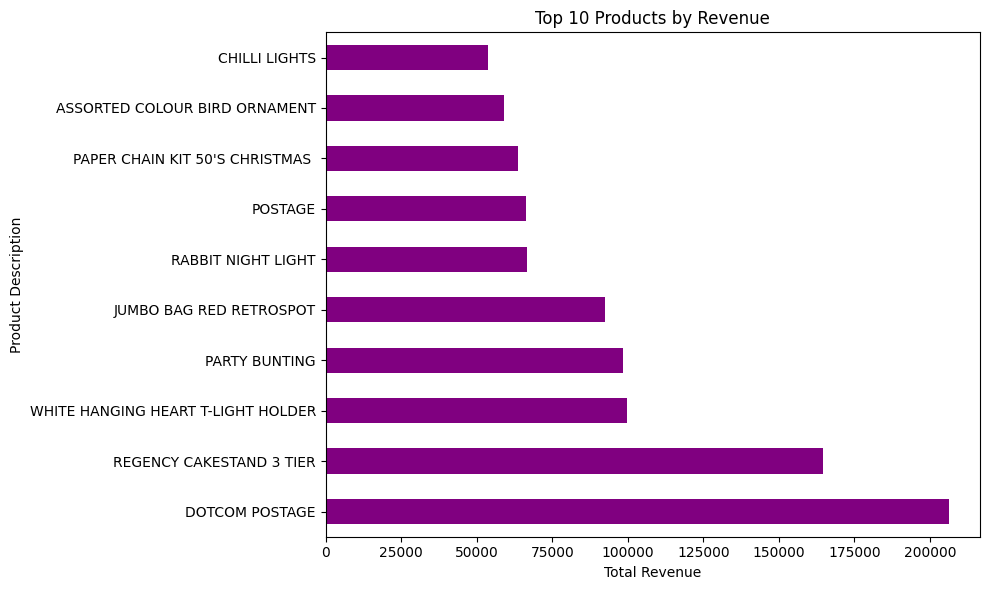

In [54]:

# Create TotalRevenue column
retail_data['TotalRevenue'] = retail_data['Quantity'] * retail_data['Price']
print("\nTotalRevenue column created.")

# Parse InvoiceDate
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data['Year'] = retail_data['InvoiceDate'].dt.year
retail_data['Month'] = retail_data['InvoiceDate'].dt.month
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.day_name()
retail_data['Hour'] = retail_data['InvoiceDate'].dt.hour
print("\nYear, Month, DayOfWeek, and Hour columns created.")

# Revenue by country
print("\nRevenue by Country:")
if 'Country' in retail_data.columns and 'TotalRevenue' in retail_data.columns:
    country_revenue = retail_data.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)
    print(country_revenue)

    plt.figure(figsize=(12, 6))
    country_revenue.plot(kind='bar', color='skyblue')
    plt.title('Total Revenue by Country')
    plt.ylabel('Total Revenue')
    plt.xlabel('Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nError: 'Country' or 'TotalRevenue' column is missing.")

# Top products by revenue
print("\nTop Products by Revenue:")
if 'Description' in retail_data.columns and 'TotalRevenue' in retail_data.columns:
    top_products = (
        retail_data.groupby('Description')
        .agg({'Quantity': 'sum', 'TotalRevenue': 'sum'})
        .sort_values(by='TotalRevenue', ascending=False)
        .head(10)
    )
    print(top_products)

    top_products['TotalRevenue'].plot(kind='barh', figsize=(10, 6), color='purple')
    plt.title('Top 10 Products by Revenue')
    plt.xlabel('Total Revenue')
    plt.ylabel('Product Description')
    plt.tight_layout()
    plt.show()
else:
    print("\nError: 'Description' or 'TotalRevenue' column is missing.")



Revenue by Day of Week &
Revenue by Hour of Day


Revenue by Day of Week:
DayOfWeek
Friday       1540628.811
Monday       1588609.431
Sunday        805678.891
Thursday     2112519.000
Tuesday      1966182.791
Wednesday    1734147.010
Name: TotalRevenue, dtype: float64


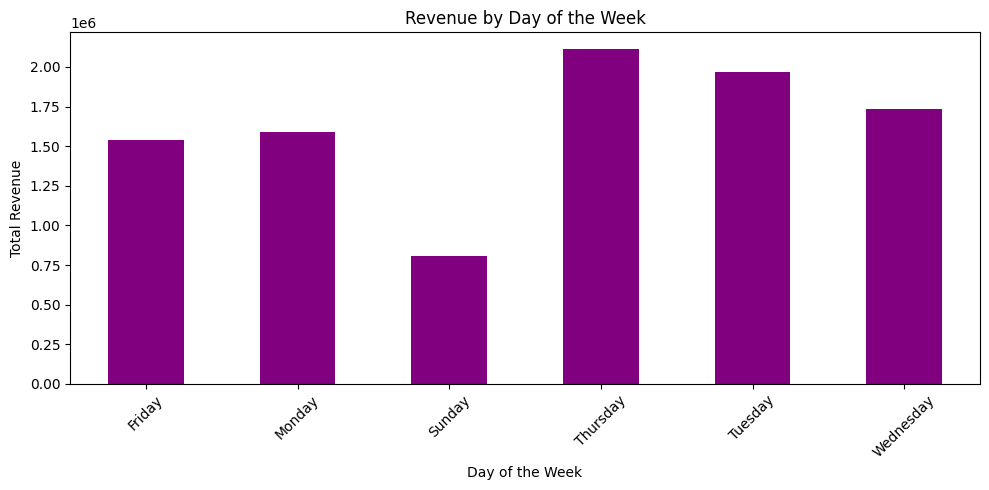


Revenue by Hour of Day:
Hour
6        -497.350
7       31009.320
8      281840.860
9      766734.051
10    1329056.521
11    1147437.920
12    1362502.290
13    1177506.370
14    1095212.901
15    1189458.280
16     729140.820
17     435444.111
18     140574.480
19      46324.990
20      16020.370
Name: TotalRevenue, dtype: float64


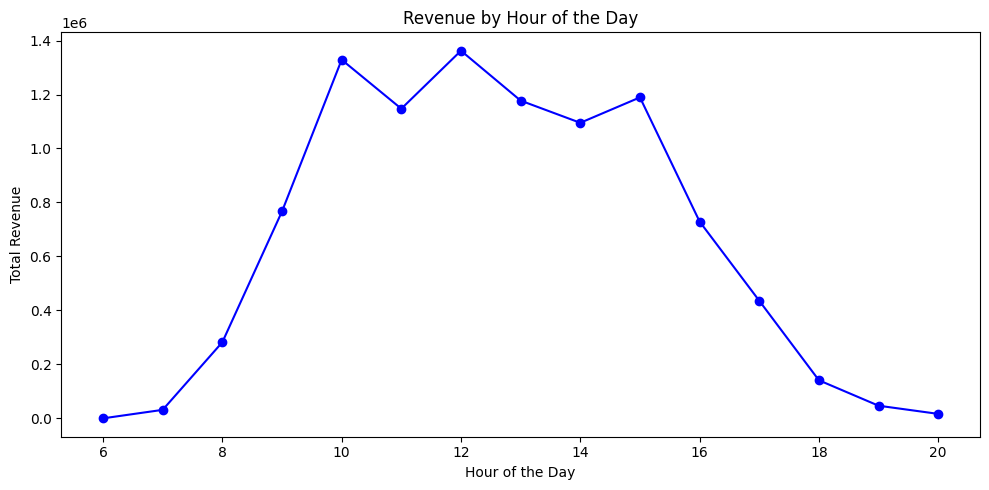

In [55]:
# Analyze revenue trends by day of the week
revenue_by_day = retail_data.groupby('DayOfWeek')['TotalRevenue'].sum()
print("\nRevenue by Day of Week:")
print(revenue_by_day)

# Plot revenue by day of the week
plt.figure(figsize=(10, 5))
revenue_by_day.plot(kind='bar', color='purple')
plt.title('Revenue by Day of the Week')
plt.ylabel('Total Revenue')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze revenue trends by hour of the day
revenue_by_hour = retail_data.groupby('Hour')['TotalRevenue'].sum()
print("\nRevenue by Hour of Day:")
print(revenue_by_hour)

# Plot revenue by hour of the day
plt.figure(figsize=(10, 5))
revenue_by_hour.plot(kind='line', marker='o', color='blue')
plt.title('Revenue by Hour of the Day')
plt.ylabel('Total Revenue')
plt.xlabel('Hour of the Day')
plt.tight_layout()
plt.show()


# 1 item set

In [4]:
%%writefile ItemFrequencyCount.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import csv

class ItemFrequencyCount(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_items,
                   reducer=self.reducer_count_items)
        ]

    def mapper_get_items(self, _, line):
        # Parse CSV line
        fields = list(csv.reader([line]))[0]
        try:
            # Assuming the third column is 'Description'
            item = fields[2]
            if item:  # Only consider non-empty items
                yield item, 1
        except IndexError:
            pass  # Ignore lines that don't have enough fields

    def reducer_count_items(self, item, counts):
        yield item, sum(counts)

if __name__ == '__main__':
    ItemFrequencyCount.run()


Writing ItemFrequencyCount.py


In [5]:
!python ItemFrequencyCount.py /content/retail_data.csv > ItemFrequencyCount_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/ItemFrequencyCount.root.20241120.154407.338624
Running step 1 of 1...
job output is in /tmp/ItemFrequencyCount.root.20241120.154407.338624/output
Streaming final output from /tmp/ItemFrequencyCount.root.20241120.154407.338624/output...
Removing temp directory /tmp/ItemFrequencyCount.root.20241120.154407.338624...


In [6]:
!cat ItemFrequencyCount_output.txt

"EMPIRE DESIGN ROSETTE"	29
"EMPIRE GIFT WRAP"	109
"EMPIRE TISSUE BOX"	173
"EMPIRE UNION JACK TV DINNER TRAY"	128
"ENAMEL BLUE RIM BISCUIT BIN"	44
"ENAMEL BLUE RIM COFFEE CONTAINER"	28
"ENAMEL BLUE RIM TEA CONTAINER"	3
"ENAMEL BOWL PANTRY"	2
"ENAMEL BREAD BIN CREAM"	473
"ENAMEL COLANDER CREAM"	170
"ENAMEL DINNER PLATE PANTRY"	1
"ENAMEL FIRE BUCKET CREAM"	118
"ENAMEL FLOWER JUG CREAM"	528
"ENAMEL JUG PANTRY"	2
"ENAMEL MEASURING JUG CREAM"	403
"ENAMEL MUG PANTRY"	1
"ENAMEL PINK COFFEE CONTAINER"	77
"ENAMEL PINK TEA CONTAINER"	73
"ENAMEL WASH BOWL CREAM"	216
"ENAMEL WATERING CAN CREAM"	212
"ENCHANTED BIRD COATHANGER 5 HOOK"	248
"ENCHANTED BIRD PLANT CAGE"	49
"ENGLISH ROSE GARDEN SECATEURS"	218
"ENGLISH ROSE HOT WATER BOTTLE"	390
"ENGLISH ROSE METAL WASTE BIN"	11
"ENGLISH ROSE NOTEBOOK A6 SIZE"	21
"ENGLISH ROSE NOTEBOOK A7 SIZE"	350
"ENGLISH ROSE SCENTED HANGING FLOWER"	117
"ENGLISH ROSE SCENTED HANGING HEART"	2
"ENGLISH ROSE SMALL SCENTED FLOWER"	49
"ENGLISH ROSE SPIRIT LEVEL "	119
"ENVELO

In [7]:
%%writefile ItemTop10Frequency.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import csv

class ItemTop10Frequency(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_items,
                   reducer=self.reducer_count_items),
            MRStep(reducer=self.reducer_find_top_10)
        ]

    def mapper_get_items(self, _, line):
        # Parse CSV line
        fields = list(csv.reader([line]))[0]
        try:
            # Assuming the third column is 'Description'
            item = fields[2]
            if item:  # Only consider non-empty items
                yield item, 1
        except IndexError:
            pass  # Ignore lines that don't have enough fields

    def reducer_count_items(self, item, counts):
        # Sum up the frequencies for each item
        yield None, (sum(counts), item)

    def reducer_find_top_10(self, _, item_frequencies):
        # Initialize the top 10 list with tuples containing minimal values
        top_10 = [(0, "")] * 10
        for frequency, item in item_frequencies:
            for i in range(10):
                if frequency > top_10[i][0]:  # Compare frequency
                    top_10.insert(i, (frequency, item))  # Insert the new item
                    top_10.pop()  # Keep the list size to 10
                    break
        for frequency, item in top_10:
            yield item, frequency

if __name__ == '__main__':
    ItemTop10Frequency.run()



Writing ItemTop10Frequency.py


In [8]:
!python ItemTop10Frequency.py /content/retail_data.csv > ItemTop10Frequency_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/ItemTop10Frequency.root.20241120.154451.079098
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/ItemTop10Frequency.root.20241120.154451.079098/output
Streaming final output from /tmp/ItemTop10Frequency.root.20241120.154451.079098/output...
Removing temp directory /tmp/ItemTop10Frequency.root.20241120.154451.079098...


In [9]:
!cat ItemTop10Frequency_output.txt

"WHITE HANGING HEART T-LIGHT HOLDER"	2369
"REGENCY CAKESTAND 3 TIER"	2200
"JUMBO BAG RED RETROSPOT"	2159
"PARTY BUNTING"	1727
"LUNCH BAG RED RETROSPOT"	1638
"ASSORTED COLOUR BIRD ORNAMENT"	1501
"SET OF 3 CAKE TINS PANTRY DESIGN "	1473
"PACK OF 72 RETROSPOT CAKE CASES"	1385
"LUNCH BAG  BLACK SKULL."	1350
"NATURAL SLATE HEART CHALKBOARD "	1280


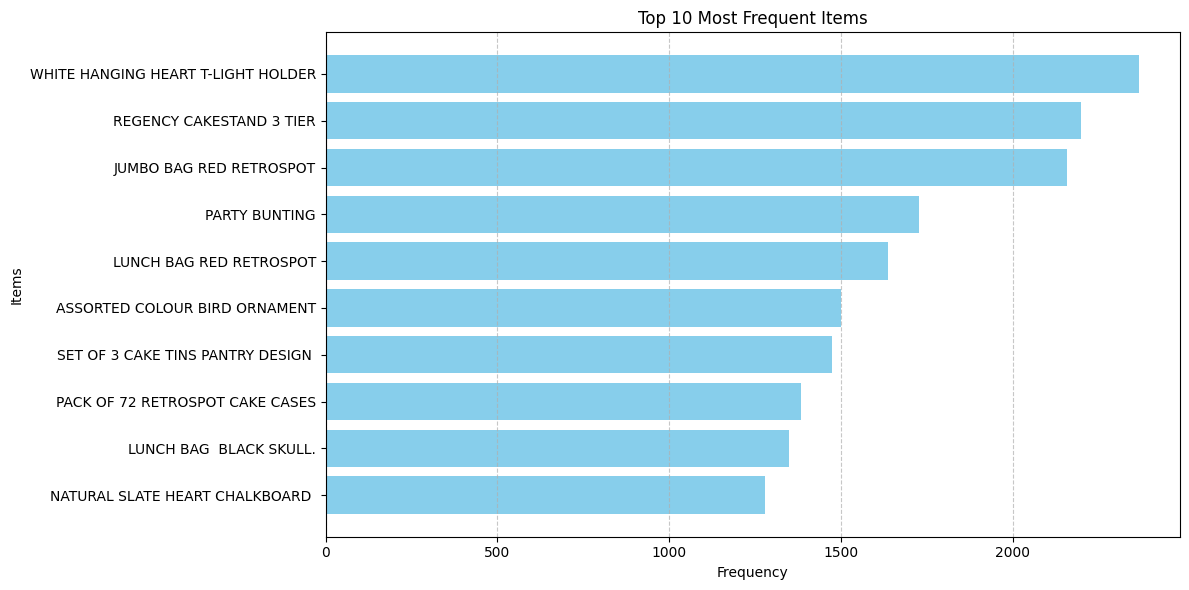

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the output file from the MapReduce job
file_path = "ItemTop10Frequency_output.txt"  # Replace with your actual output file path
data = pd.read_csv(file_path, delimiter='\t', header=None, names=["Item", "Frequency"])

# Sort data by frequency in descending order (already sorted if MapReduce logic is correct)
data["Frequency"] = data["Frequency"].astype(int)  # Ensure frequency is treated as an integer

# Plot a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(data["Item"], data["Frequency"], color="skyblue")
plt.title("Top 10 Most Frequent Items")
plt.xlabel("Frequency")
plt.ylabel("Items")
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent item at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 2 itemset (pair) genaration:

In [10]:
%%writefile PairFrequencyCount.py

from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations
import csv

class PairFrequencyCount(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_group_by_invoice,
                   reducer=self.reducer_collect_items),
            MRStep(mapper=self.mapper_generate_pairs,
                   reducer=self.reducer_count_pairs)
        ]

    def mapper_group_by_invoice(self, _, line):
        # Parse the CSV line
        fields = list(csv.reader([line]))[0]
        try:
            invoice = fields[0]  # Invoice
            description = fields[2]  # Product Description
            if invoice and description:
                yield invoice, description
        except IndexError:
            pass  # Ignore lines that don't have enough fields

    def reducer_collect_items(self, invoice, descriptions):
        # Collect all items for the same invoice
        items = list(descriptions)
        yield None, items

    def mapper_generate_pairs(self, _, items):
        # Generate all unique pairs from the items in a single transaction
        for pair in combinations(sorted(items), 2):
            yield pair, 1

    def reducer_count_pairs(self, pair, counts):
        # Sum up counts for each pair
        yield pair, sum(counts)

if __name__ == '__main__':
    PairFrequencyCount.run()


Writing PairFrequencyCount.py


In [11]:
!python PairFrequencyCount.py /content/retail_data.csv > PairFrequencyCount_output.txt
!cat PairFrequencyCount_output.txt

Streaming output truncated to the last 5000 lines.
["METAL SIGN EMPIRE TEA", "SET OF 2 WOODEN MARKET CRATES"]	7
["METAL SIGN EMPIRE TEA", "SET OF 20 KIDS COOKIE CUTTERS"]	19
["METAL SIGN EMPIRE TEA", "SET OF 20 VINTAGE CHRISTMAS NAPKINS"]	31
["METAL SIGN EMPIRE TEA", "SET OF 3 BABUSHKA STACKING TINS"]	1
["METAL SIGN EMPIRE TEA", "SET OF 3 BIRD LIGHT PINK FEATHER "]	21
["METAL SIGN EMPIRE TEA", "SET OF 3 BUTTERFLY COOKIE CUTTERS"]	25
["METAL SIGN EMPIRE TEA", "SET OF 3 CAKE TINS PANTRY DESIGN "]	46
["METAL SIGN EMPIRE TEA", "SET OF 3 CAKE TINS SKETCHBOOK"]	16
["METAL SIGN EMPIRE TEA", "SET OF 3 CONEY ISLAND OVAL BOXES"]	2
["METAL SIGN EMPIRE TEA", "SET OF 3 HANGING OWLS OLLIE BEAK"]	18
["METAL SIGN EMPIRE TEA", "SET OF 3 HEART COOKIE CUTTERS"]	25
["METAL SIGN EMPIRE TEA", "SET OF 3 NOTEBOOKS IN PARCEL"]	18
["METAL SIGN EMPIRE TEA", "SET OF 3 PANTRY WOODEN SPOONS"]	5
["METAL SIGN EMPIRE TEA", "SET OF 3 REGENCY CAKE TINS"]	21
["METAL SIGN EMPIRE TEA", "SET OF 3 WOODEN HEART DECORATIONS"]	

top 10

In [12]:
%%writefile TopPairsFrequency.py

from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations
import csv

class TopPairsFrequency(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_group_by_invoice,
                   reducer=self.reducer_collect_items),
            MRStep(mapper=self.mapper_generate_pairs,
                   reducer=self.reducer_count_pairs),
            MRStep(mapper=self.mapper_prepare_for_sorting,
                   reducer=self.reducer_get_top_10_pairs)
        ]

    def mapper_group_by_invoice(self, _, line):
        # Parse the CSV line
        fields = list(csv.reader([line]))[0]
        try:
            invoice = fields[0]  # Invoice
            description = fields[2]  # Product Description
            if invoice and description:
                yield invoice, description
        except IndexError:
            pass  # Ignore lines that don't have enough fields

    def reducer_collect_items(self, invoice, descriptions):
        # Collect all items for the same invoice
        items = list(descriptions)
        yield None, items

    def mapper_generate_pairs(self, _, items):
        # Generate all unique pairs from the items in a single transaction
        for pair in combinations(sorted(items), 2):
            yield pair, 1

    def reducer_count_pairs(self, pair, counts):
        # Sum up counts for each pair
        yield None, (sum(counts), pair)

    def mapper_prepare_for_sorting(self, _, pair_data):
        # Prepare data for sorting
        frequency, pair = pair_data
        yield None, (frequency, pair)

    def reducer_get_top_10_pairs(self, _, pair_data):
        # Get the top 10 pairs by frequency
        top_10 = sorted(pair_data, reverse=True)[:10]
        for frequency, pair in top_10:
            yield pair, frequency

if __name__ == '__main__':
    TopPairsFrequency.run()


Writing TopPairsFrequency.py


In [13]:
!python TopPairsFrequency.py /content/retail_data.csv > TopPairsFrequency_output.txt
!cat TopPairsFrequency_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/TopPairsFrequency.root.20241120.165807.171233
Running step 1 of 3...
Running step 2 of 3...
Running step 3 of 3...
job output is in /tmp/TopPairsFrequency.root.20241120.165807.171233/output
Streaming final output from /tmp/TopPairsFrequency.root.20241120.165807.171233/output...
Removing temp directory /tmp/TopPairsFrequency.root.20241120.165807.171233...
["GREEN REGENCY TEACUP AND SAUCER", "PINK REGENCY TEACUP AND SAUCER"]	905
["JUMBO BAG PINK POLKADOT", "JUMBO BAG RED RETROSPOT"]	871
["GREEN REGENCY TEACUP AND SAUCER", "ROSES REGENCY TEACUP AND SAUCER "]	861
["JUMBO BAG RED RETROSPOT", "JUMBO STORAGE BAG SUKI"]	756
["ALARM CLOCK BAKELIKE GREEN", "ALARM CLOCK BAKELIKE RED "]	711
["LUNCH BAG  BLACK SKULL.", "LUNCH BAG RED RETROSPOT"]	705
["JUMBO BAG RED RETROSPOT", "JUMBO SHOPPER VINTAGE RED PAISLEY"]	697
["PINK REGENCY TEACUP AND SAUCER", "ROSES REGENCY TEACUP AND SA

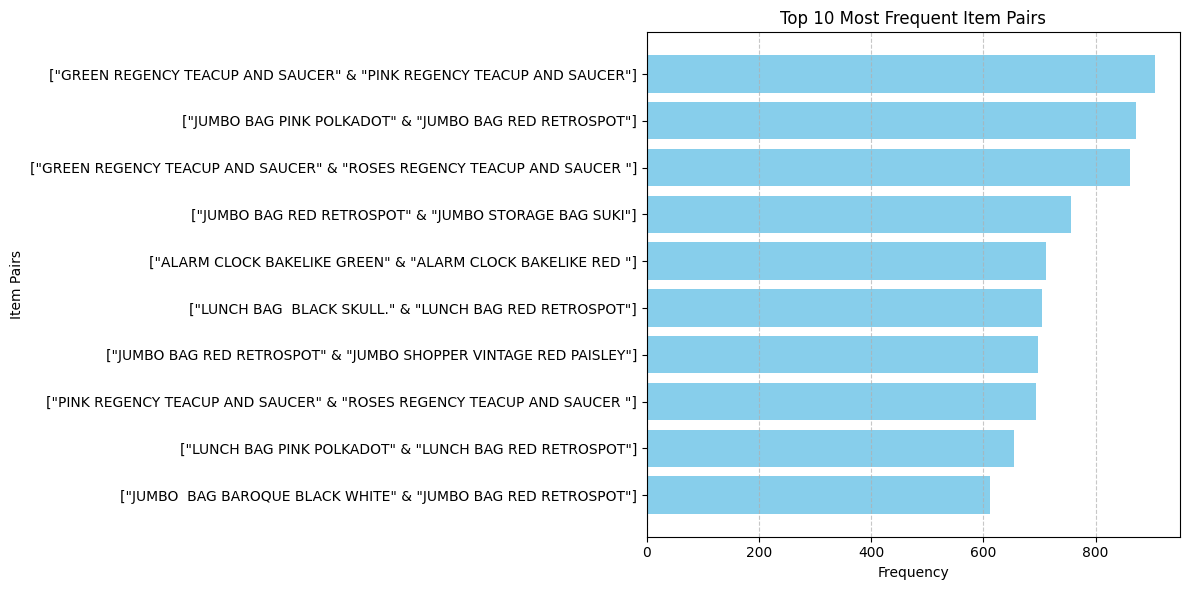

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the output file into a pandas DataFrame
output_file = "TopPairsFrequency_output.txt"  # Replace with your actual file path
data = pd.read_csv(output_file, delimiter='\t', header=None, names=['Pair', 'Frequency'])

# Clean and format the Pair column
data['Pair'] = data['Pair'].str.replace(r"[()']", "", regex=True).str.replace(",", " &")

# Sort by Frequency and select the top 10
top_pairs = data.nlargest(10, 'Frequency')

# Plot the top 10 item pairs
plt.figure(figsize=(12, 6))
plt.barh(top_pairs['Pair'], top_pairs['Frequency'], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Item Pairs")
plt.title("Top 10 Most Frequent Item Pairs")
plt.gca().invert_yaxis()  # Most frequent pair at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 3 itemset (incomplete takes huge time)

In [14]:
%%writefile ThreeItemsetFrequency.py

from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations
import csv

class ThreeItemsetFrequency(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_group_by_invoice,
                   reducer=self.reducer_collect_items),
            MRStep(mapper=self.mapper_generate_itemsets,
                   reducer=self.reducer_count_itemsets)
        ]

    def mapper_group_by_invoice(self, _, line):
        # Parse the CSV line
        fields = list(csv.reader([line]))[0]
        try:
            invoice = fields[0]  # Invoice
            description = fields[2]  # Product Description
            if invoice and description:
                yield invoice, description
        except IndexError:
            pass  # Ignore lines that don't have enough fields

    def reducer_collect_items(self, invoice, descriptions):
        # Collect all items for the same invoice
        items = list(descriptions)
        yield None, items

    def mapper_generate_itemsets(self, _, items):
        # Generate all unique 3-itemsets from the items in a single transaction
        for itemset in combinations(sorted(items), 3):
            yield itemset, 1

    def reducer_count_itemsets(self, itemset, counts):
        # Sum up counts for each 3-itemset
        yield itemset, sum(counts)

if __name__ == '__main__':
    ThreeItemsetFrequency.run()


Writing ThreeItemsetFrequency.py


In [15]:
!python ThreeItemsetFrequency.py /content/retail_data.csv > ThreeItemsetFrequency_output.txt
!cat ThreeItemsetFrequency_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/ThreeItemsetFrequency.root.20241120.171535.733073
Running step 1 of 2...
Running step 2 of 2...
Traceback (most recent call last):
  File "/content/ThreeItemsetFrequency.py", line 43, in <module>
    ThreeItemsetFrequency.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 616, in run
    cls().execute()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 687, in execute
    self.run_job()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 636, in run_job
    runner.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/runner.py", line 503, in run
    self._run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/sim.py", line 161, in _run
    self._run_step(step, step_num)
  File "/usr/local/lib/python3.10/dist-packages/mrjob/sim.py", line 170, in _run_step
    self._run_streaming_step(step, step_num)
 

In [16]:
%%writefile TopThreeItemsetFrequency.py

from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations
import csv

class TopThreeItemsetFrequency(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_group_by_invoice,
                   reducer=self.reducer_collect_items),
            MRStep(mapper=self.mapper_generate_itemsets,
                   reducer=self.reducer_count_itemsets),
            MRStep(mapper=self.mapper_prepare_for_sorting,
                   reducer=self.reducer_get_top_10_itemsets)
        ]

    def mapper_group_by_invoice(self, _, line):
        # Parse the CSV line
        fields = list(csv.reader([line]))[0]
        try:
            invoice = fields[0]  # Invoice
            description = fields[2]  # Product Description
            if invoice and description:
                yield invoice, description
        except IndexError:
            pass  # Ignore lines that don't have enough fields

    def reducer_collect_items(self, invoice, descriptions):
        # Collect all items for the same invoice
        items = list(descriptions)
        yield None, items

    def mapper_generate_itemsets(self, _, items):
        # Generate all unique 3-itemsets from the items in a single transaction
        for itemset in combinations(sorted(items), 3):
            yield itemset, 1

    def reducer_count_itemsets(self, itemset, counts):
        # Sum up counts for each 3-itemset
        yield None, (sum(counts), itemset)

    def mapper_prepare_for_sorting(self, _, itemset_data):
        # Prepare data for sorting by emitting (frequency, itemset)
        frequency, itemset = itemset_data
        yield None, (frequency, itemset)

    def reducer_get_top_10_itemsets(self, _, itemset_data):
        # Sort and get the top 10 3-itemsets by frequency
        top_10 = sorted(itemset_data, reverse=True)[:10]
        for frequency, itemset in top_10:
            yield itemset, frequency

if __name__ == '__main__':
    TopThreeItemsetFrequency.run()


Writing TopThreeItemsetFrequency.py


In [17]:
!python TopThreeItemsetFrequency.py /content/retail_data.csv > TopThreeItemsetFrequency_output.txt
!cat TopThreeItemsetFrequency_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/TopThreeItemsetFrequency.root.20241120.180147.658848
Running step 1 of 3...
Running step 2 of 3...
Traceback (most recent call last):
  File "/content/TopThreeItemsetFrequency.py", line 56, in <module>
    TopThreeItemsetFrequency.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 616, in run
    cls().execute()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 687, in execute
    self.run_job()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 636, in run_job
    runner.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/runner.py", line 503, in run
    self._run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/sim.py", line 161, in _run
    self._run_step(step, step_num)
  File "/usr/local/lib/python3.10/dist-packages/mrjob/sim.py", line 170, in _run_step
    self._run_streaming_step(step, st

#Probability of 1 itemset
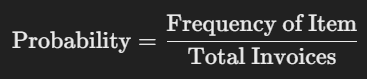

In [29]:
%%writefile ProbabilityOneItemset.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import csv

class ProbabilityOneItemset(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_items,
                   reducer=self.reducer_count_items),
            MRStep(reducer=self.reducer_compute_probability)
        ]

    def mapper_get_items(self, _, line):
        # Parse the CSV line
        fields = list(csv.reader([line]))[0]
        try:
            # Extract invoice and item description
            invoice = fields[0]
            description = fields[2]
            if invoice and description:
                yield description, 1  # Emit each item with a count of 1
        except IndexError:
            pass

    def reducer_count_items(self, item, counts):
        # Aggregate counts for each item
        yield item, sum(counts)

    def reducer_compute_probability(self, item, counts):
        # Total invoices (manually input from the previous result)
        total_invoices = 25901
        # Compute probability
        frequency = sum(counts)
        probability = frequency / total_invoices
        yield item, probability

if __name__ == '__main__':
    ProbabilityOneItemset.run()


Writing ProbabilityOneItemset.py


In [30]:
!python ProbabilityOneItemset.py /content/retail_data.csv > ProbabilityOneItemset_output.txt
!cat ProbabilityOneItemset_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/ProbabilityOneItemset.root.20241120.185253.809130
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/ProbabilityOneItemset.root.20241120.185253.809130/output
Streaming final output from /tmp/ProbabilityOneItemset.root.20241120.185253.809130/output...
Removing temp directory /tmp/ProbabilityOneItemset.root.20241120.185253.809130...
"DOLLCRAFT GIRL AMELIE KIT"	0.00030886838346009805
"DOLLCRAFT GIRL AMELIE"	0.00030886838346009805
"DOLLCRAFT GIRL NICOLE"	0.0004633025751901471
"DOLLY CABINET 2 DRAWERS "	0.0008107795065827574
"DOLLY CABINET 3 DRAWERS "	0.0013126906297054168
"DOLLY GIRL BABY GIFT SET"	0.005366588162619204
"DOLLY GIRL CHILDRENS BOWL"	0.007567275394772402
"DOLLY GIRL CHILDRENS CUP"	0.007721709586502452
"DOLLY GIRL CHILDRENS EGG CUP"	0.005327979614686691
"DOLLY GIRL LUNCH BOX"	0.0340141307285433
"DOLLY GIRL MINI BACKPACK"	0.006524844600594572


In [31]:
# Post-processing the MRJob output to get the top 10 items by probability

# Read the MRJob output
with open('ProbabilityOneItemset_output.txt', 'r') as f:
    # Create a list of tuples (probability, item)
    data = []
    for line in f:
        item, probability = line.strip().split('\t')
        probability = float(probability)
        data.append((probability, item))

# Sort the data by probability in descending order
sorted_data = sorted(data, reverse=True, key=lambda x: x[0])

# Extract the top 10 items
top_10_items = sorted_data[:10]

# Print the top 10 items by probability
for probability, item in top_10_items:
    print(f"Item: {item}, Probability: {probability:.6f}")


Item: "WHITE HANGING HEART T-LIGHT HOLDER", Probability: 0.091464
Item: "REGENCY CAKESTAND 3 TIER", Probability: 0.084939
Item: "JUMBO BAG RED RETROSPOT", Probability: 0.083356
Item: "PARTY BUNTING", Probability: 0.066677
Item: "LUNCH BAG RED RETROSPOT", Probability: 0.063241
Item: "ASSORTED COLOUR BIRD ORNAMENT", Probability: 0.057951
Item: "SET OF 3 CAKE TINS PANTRY DESIGN ", Probability: 0.056870
Item: "PACK OF 72 RETROSPOT CAKE CASES", Probability: 0.053473
Item: "LUNCH BAG  BLACK SKULL.", Probability: 0.052122
Item: "NATURAL SLATE HEART CHALKBOARD ", Probability: 0.049419


# Probability of 2 itemset
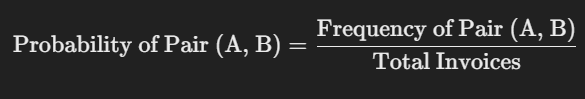

In [32]:
%%writefile ProbabilityTwoItemset.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import csv
import itertools

class ProbabilityTwoItemset(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_pairs,
                   reducer=self.reducer_count_pairs),
            MRStep(reducer=self.reducer_compute_probability)
        ]

    def mapper_get_pairs(self, _, line):
        # Parse CSV line
        fields = list(csv.reader([line]))[0]
        try:
            # Extract invoice and item description
            invoice = fields[0]
            description = fields[2]
            if invoice and description:
                # Emit each pair of items in the same invoice
                yield invoice, description
        except IndexError:
            pass

    def reducer_count_pairs(self, invoice, items):
        # For each invoice, generate pairs of items
        items_list = list(items)
        pairs = itertools.combinations(sorted(set(items_list)), 2)  # Sort and generate 2-item combinations
        for pair in pairs:
            yield pair, 1  # Emit the pair with count 1

    def reducer_compute_probability(self, pair, counts):
        # Total invoices (manually input from the previous result)
        total_invoices = 25900
        # Compute the frequency of the pair
        frequency = sum(counts)
        # Compute the probability
        probability = frequency / total_invoices
        yield pair, probability

if __name__ == '__main__':
    ProbabilityTwoItemset.run()


Writing ProbabilityTwoItemset.py


In [33]:
!python ProbabilityTwoItemset.py /content/retail_data.csv > ProbabilityTwoItemset_output.txt
!cat ProbabilityTwoItemset_output.txt


Streaming output truncated to the last 5000 lines.
["METAL SIGN DROP YOUR PANTS", "SET 6 PAPER TABLE LANTERN HEARTS "]	0.0007722007722007722
["METAL SIGN DROP YOUR PANTS", "SET 6 PAPER TABLE LANTERN STARS "]	0.000888030888030888
["METAL SIGN DROP YOUR PANTS", "SET 6 SCHOOL MILK BOTTLES IN CRATE"]	0.001698841698841699
["METAL SIGN DROP YOUR PANTS", "SET 7 BABUSHKA NESTING BOXES"]	0.0004633204633204633
["METAL SIGN DROP YOUR PANTS", "SET 8 CANDLES VINTAGE DOILY"]	0.00019305019305019305
["METAL SIGN DROP YOUR PANTS", "SET OF 10 LANTERNS FAIRY LIGHT STAR"]	0.00011583011583011582
["METAL SIGN DROP YOUR PANTS", "SET OF 10 LED DOLLY LIGHTS"]	0.0004633204633204633
["METAL SIGN DROP YOUR PANTS", "SET OF 12  VINTAGE POSTCARD SET"]	0.00015444015444015445
["METAL SIGN DROP YOUR PANTS", "SET OF 12 FAIRY CAKE BAKING CASES"]	0.0013127413127413127
["METAL SIGN DROP YOUR PANTS", "SET OF 12 FORK CANDLES"]	0.0006563706563706564
["METAL SIGN DROP YOUR PANTS", "SET OF 12 MINI LOAF BAKING CASES"]	0.00115830

In [35]:
# Post-processing the MRJob output to get the top 10 item pairs by probability

# Read the MRJob output
with open('ProbabilityTwoItemset_output.txt', 'r') as f:
    # Create a list of tuples (probability, (item1, item2))
    data = []
    for line in f:
        pair, probability = line.strip().split('\t')
        item1, item2 = eval(pair)  # Convert string representation of tuple back to tuple
        probability = float(probability)
        data.append((probability, item1, item2))

# Sort the data by probability in descending order
sorted_data = sorted(data, reverse=True, key=lambda x: x[0])

# Extract the top 10 pairs
top_10_pairs = sorted_data[:10]

# Print the top 10 pairs by probability
for probability, item1, item2 in top_10_pairs:
    print(f"Pair: ({item1}, {item2}), Probability: {probability:.6f}")


Pair: (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT), Probability: 0.032162
Pair: (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER ), Probability: 0.030270
Pair: (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI), Probability: 0.028301
Pair: (JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAGE RED PAISLEY), Probability: 0.026371
Pair: (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROSPOT), Probability: 0.025019
Pair: (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED ), Probability: 0.024942
Pair: (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER), Probability: 0.024865
Pair: (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER ), Probability: 0.023707
Pair: (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROSPOT), Probability: 0.023668
Pair: (JUMBO  BAG BAROQUE BLACK WHITE, JUMBO BAG RED RETROSPOT), Probability: 0.022896


# Confidence
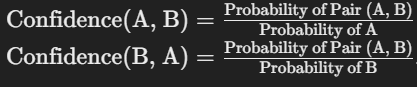

In [40]:
%%writefile ConfidenceTwoItemset.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import csv
import itertools

class ConfidenceTwoItemset(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_pairs,
                   reducer=self.reducer_count_pairs),
            MRStep(mapper=self.mapper_get_item_frequencies,
                   reducer=self.reducer_compute_confidence)
        ]

    def mapper_get_pairs(self, _, line):
        # Decode binary input to text
        line = line.decode('utf-8') if isinstance(line, bytes) else line
        # Parse CSV line
        fields = list(csv.reader([line]))[0]
        try:
            # Extract invoice and item description
            invoice = fields[0]
            description = fields[2]
            if invoice and description:
                # Emit each pair of items in the same invoice
                yield invoice, description
        except IndexError:
            pass

    def reducer_count_pairs(self, invoice, items):
        # Generate pairs of items in the same invoice
        items_list = list(items)
        pairs = itertools.combinations(sorted(set(items_list)), 2)  # Sort and generate 2-item combinations
        for pair in pairs:
            yield pair, 1  # Emit the pair with count 1

    def mapper_get_item_frequencies(self, key, value):
        # Emit items from pairs for frequency calculation
        yield key, value

    def reducer_compute_confidence(self, pair, counts):
        total_invoices = 25900  # Replace this with the total number of invoices
        # Compute the frequency of the pair
        pair_frequency = sum(counts)
        # Compute the probability of the pair
        pair_probability = pair_frequency / total_invoices

        yield pair, pair_probability


if __name__ == '__main__':
    ConfidenceTwoItemset.run()


Overwriting ConfidenceTwoItemset.py


In [41]:
!python ConfidenceTwoItemset.py /content/retail_data.csv > ConfidenceTwoItemset_output.txt
!cat ConfidenceTwoItemset_output.txt


Streaming output truncated to the last 5000 lines.
["METAL SIGN DROP YOUR PANTS", "SET 6 PAPER TABLE LANTERN HEARTS "]	0.0007722007722007722
["METAL SIGN DROP YOUR PANTS", "SET 6 PAPER TABLE LANTERN STARS "]	0.000888030888030888
["METAL SIGN DROP YOUR PANTS", "SET 6 SCHOOL MILK BOTTLES IN CRATE"]	0.001698841698841699
["METAL SIGN DROP YOUR PANTS", "SET 7 BABUSHKA NESTING BOXES"]	0.0004633204633204633
["METAL SIGN DROP YOUR PANTS", "SET 8 CANDLES VINTAGE DOILY"]	0.00019305019305019305
["METAL SIGN DROP YOUR PANTS", "SET OF 10 LANTERNS FAIRY LIGHT STAR"]	0.00011583011583011582
["METAL SIGN DROP YOUR PANTS", "SET OF 10 LED DOLLY LIGHTS"]	0.0004633204633204633
["METAL SIGN DROP YOUR PANTS", "SET OF 12  VINTAGE POSTCARD SET"]	0.00015444015444015445
["METAL SIGN DROP YOUR PANTS", "SET OF 12 FAIRY CAKE BAKING CASES"]	0.0013127413127413127
["METAL SIGN DROP YOUR PANTS", "SET OF 12 FORK CANDLES"]	0.0006563706563706564
["METAL SIGN DROP YOUR PANTS", "SET OF 12 MINI LOAF BAKING CASES"]	0.00115830

top 10

Input:

In [44]:
%%writefile ConfidenceSpecificPair.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import csv
from itertools import combinations


class ConfidenceSpecificPair(MRJob):

    def configure_args(self):
        super(ConfidenceSpecificPair, self).configure_args()
        self.add_passthru_arg('--itemA', type=str, help='First item for confidence calculation')
        self.add_passthru_arg('--itemB', type=str, help='Second item for confidence calculation')

    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_pairs,
                   reducer=self.reducer_count_pairs),
            MRStep(reducer=self.reducer_calculate_confidence)
        ]

    def mapper_get_pairs(self, _, line):
        # Parse CSV line
        fields = list(csv.reader([line]))[0]
        try:
            invoice = fields[0]  # Invoice Number
            item = fields[2]     # Item Description
            if invoice and item:
                yield invoice, item
        except IndexError:
            pass  # Ignore lines with missing fields

    def reducer_count_pairs(self, invoice, items):
        # Collect all items in the same invoice
        items = list(items)
        for item in items:
            yield ("item", item), 1  # Individual item count
        for pair in combinations(items, 2):
            yield ("pair", tuple(sorted(pair))), 1  # Item pair count

    def reducer_calculate_confidence(self, key, values):
        # Initialize counts
        total_itemA = 0
        total_itemB = 0
        total_pair = 0

        # Target items for confidence calculation
        itemA = self.options.itemA
        itemB = self.options.itemB

        # Aggregate counts
        count = sum(values)
        if key[0] == "item":
            item = key[1]
            if item == itemA:
                total_itemA = count
            elif item == itemB:
                total_itemB = count
        elif key[0] == "pair":
            pair = key[1]
            if tuple(sorted(pair)) == (itemA, itemB):
                total_pair = count

        # Calculate confidence values
        if total_itemA > 0 and total_pair > 0:
            confidence_A_B = total_pair / total_itemA
            yield f"Confidence({itemA} -> {itemB})", confidence_A_B

        if total_itemB > 0 and total_pair > 0:
            confidence_B_A = total_pair / total_itemB
            yield f"Confidence({itemB} -> {itemA})", confidence_B_A


if __name__ == "__main__":
    ConfidenceSpecificPair.run()


Writing ConfidenceSpecificPair.py


In [47]:
!python ConfidenceSpecificPair.py /content/retail_data.csv --itemA "JUMBO BAG PINK POLKADOT" --itemB "JUMBO BAG RED RETROSPOT"


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/ConfidenceSpecificPair.root.20241120.213836.266057
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/ConfidenceSpecificPair.root.20241120.213836.266057/output
Streaming final output from /tmp/ConfidenceSpecificPair.root.20241120.213836.266057/output...
Removing temp directory /tmp/ConfidenceSpecificPair.root.20241120.213836.266057...


In [50]:
!cat /tmp/ConfidenceSpecificPair.root.20241120.213836.266057/output/part-00000


cat: /tmp/ConfidenceSpecificPair.root.20241120.213836.266057/output/part-00000: No such file or directory


# Some other MR_JOB for Dataset analysis

**Sales Trend**

In [ ]:
%%writefile SalesTrends.py
from mrjob.job import MRJob
import datetime

class SalesTrendsMRJob(MRJob):

    def mapper(self, _, line):
        fields = line.split(',')

        try:
            # Extract necessary fields
            invoice_date = fields[4]  # Assuming 'InvoiceDate' is the 5th column
            quantity = int(fields[3])  # Assuming 'Quantity' is the 4th column
            price = float(fields[5])  # Assuming 'Price' is the 6th column

            # Calculate total sales
            total_sales = quantity * price

            # Convert the date part of InvoiceDate to a string format
            date = datetime.datetime.strptime(invoice_date.split()[0], "%m/%d/%Y").strftime("%Y-%m-%d")
            yield date, total_sales
        except Exception as e:
            # Skip rows with invalid or missing data
            pass

    def reducer(self, date, sales):
        # Aggregate sales for each date
        yield date, sum(sales)

if __name__ == '__main__':
    SalesTrendsMRJob.run()


Overwriting SalesTrends.py


In [ ]:
!python SalesTrends.py /content/retail_data.csv > SalesTrends_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/SalesTrends.root.20241120.065044.098860
Running step 1 of 1...
job output is in /tmp/SalesTrends.root.20241120.065044.098860/output
Streaming final output from /tmp/SalesTrends.root.20241120.065044.098860/output...
Removing temp directory /tmp/SalesTrends.root.20241120.065044.098860...


In [ ]:
!cat SalesTrends_output.txt



"2010-12-01"	58299.710000000254
"2010-12-02"	45736.87999999992
"2010-12-03"	45404.78999999989
"2010-12-05"	31009.700000000168
"2010-12-06"	53587.290000000015
"2010-12-07"	44897.78000000015
"2010-12-08"	44096.74999999987
"2010-12-09"	52357.69000000002
"2010-12-10"	57295.46000000016
"2010-12-12"	17122.610000000055
"2010-12-13"	35080.120000000075
"2010-12-14"	42496.42000000021
"2010-12-15"	29252.540000000125
"2010-12-16"	48002.079999999936
"2010-12-17"	43194.90999999998
"2010-12-19"	7485.449999999991
"2010-12-20"	24522.59000000001
"2010-12-21"	46752.449999999924
"2010-12-22"	6066.169999999998
"2010-12-23"	11648.910000000024
"2011-01-04"	14713.390000000016
"2011-01-05"	-2103.1399999999635
"2011-01-06"	37141.48000000002
"2011-01-07"	26954.970000000052
"2011-01-09"	15551.260000000022
"2011-01-10"	24014.16999999999
"2011-01-11"	67678.95000000017
"2011-01-12"	23705.369999999984
"2011-01-13"	20306.65
"2011-01-14"	47148.42000000009
"2011-01-16"	7019.3199999999815
"2011-01-17"	28954.32000000031
"

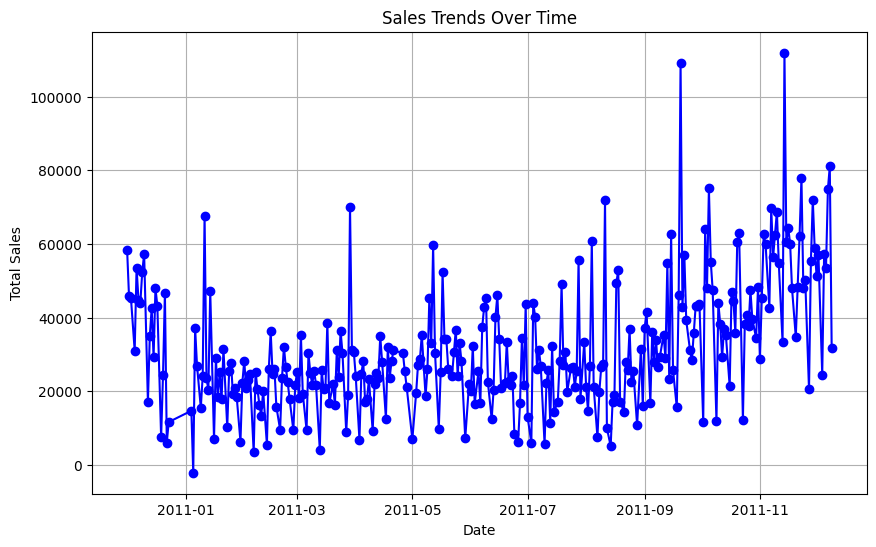

In [ ]:
# Load the MRJob output file
file_path = 'SalesTrends_output.txt'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['Date', 'Sales'])

# Ensure 'Sales' is numeric
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop any invalid rows
data.dropna(subset=['Sales', 'Date'], inplace=True)

# Sort by date
data.sort_values(by='Date', inplace=True)

# Plot the sales trends
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], marker='o', linestyle='-', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**Top Selling Products**

**Countrywise Sales Distribution**

In [ ]:
%%writefile CountrySales.py
from mrjob.job import MRJob

class CountrySalesMRJob(MRJob):

    def mapper(self, _, line):
        fields = line.split(',')

        try:
            # Extract necessary fields
            country = fields[7]  # Assuming 'Country' is the 8th column
            quantity = int(fields[3])  # Assuming 'Quantity' is the 4th column
            price = float(fields[5])  # Assuming 'Price' is the 6th column

            # Calculate total sales
            total_sales = quantity * price
            yield country, total_sales
        except:
            pass  # Skip invalid rows

    def reducer(self, country, sales):
        # Aggregate sales by country
        yield country, sum(sales)

if __name__ == '__main__':
    CountrySalesMRJob.run()


Writing CountrySales.py


In [ ]:
!python CountrySales.py /content/retail_data.csv > CountrySales_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/CountrySales.root.20241120.071318.412190
Running step 1 of 1...
job output is in /tmp/CountrySales.root.20241120.071318.412190/output
Streaming final output from /tmp/CountrySales.root.20241120.071318.412190/output...
Removing temp directory /tmp/CountrySales.root.20241120.071318.412190...


In [ ]:
!cat CountrySales_output.txt

"Australia"	135330.18999999977
"Austria"	10149.279999999995
"Bahrain"	548.4
"Belgium"	40752.82999999999
"Brazil"	1143.6000000000001
"Canada"	3599.6800000000017
"Channel Islands"	19950.539999999954
"Cyprus"	12791.309999999998
"Czech Republic"	707.72
"Denmark"	18665.18
"EIRE"	262112.47999999853
"European Community"	1291.75
"Finland"	22226.689999999973
"France"	197212.15000000005
"Germany"	220791.77999999863
"Greece"	4644.82
"Hong Kong"	10037.840000000002
"Iceland"	4299.799999999998
"Israel"	7867.4199999999955
"Italy"	16506.030000000002
"Japan"	34616.060000000005
"Lebanon"	1693.8800000000003
"Lithuania"	1661.06
"Malta"	2503.1900000000005
"Netherlands"	283440.6599999999
"Norway"	34908.130000000034
"Poland"	7193.339999999997
"Portugal"	29272.339999999997
"RSA"	1002.3099999999998
"Saudi Arabia"	131.17
"Singapore"	9054.69
"Spain"	54632.859999999964
"Sweden"	36374.15000000001
"Switzerland"	56199.23000000009
"USA"	1730.9200000000005
"United Arab Emirates"	1877.0800000000004
"United Kingdom"	814

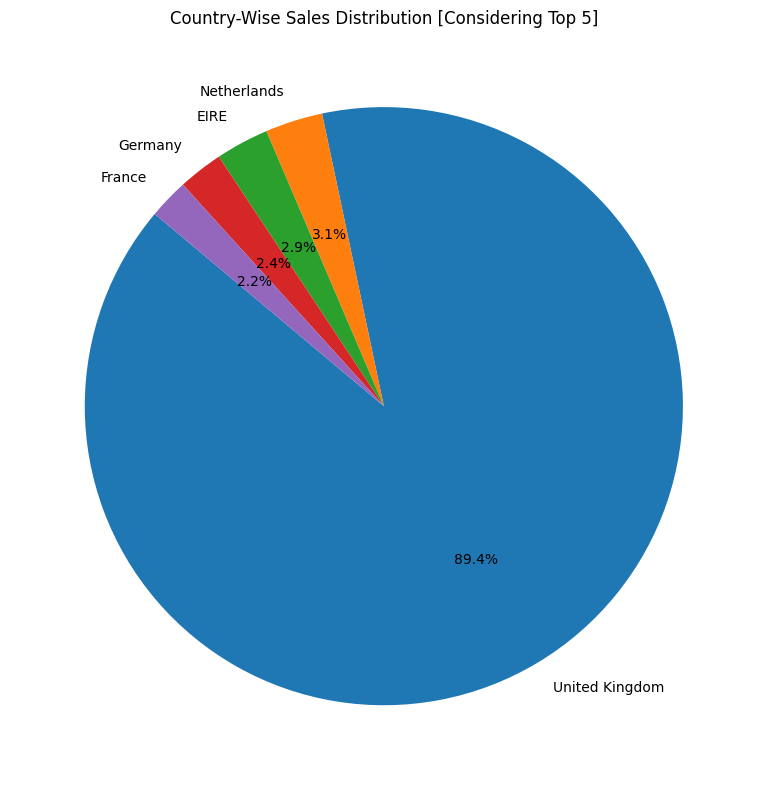

In [ ]:
# Load and visualize country sales
data = pd.read_csv('CountrySales_output.txt', delimiter='\t', header=None, names=['Country', 'Sales'])

# Sort data by sales
data.sort_values(by='Sales', ascending=False, inplace=True)

# Extract top 10 countries and their sales
top_countries = data['Country'][:5]
top_sales = data['Sales'][:5]

# Plot top 10 countries as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_sales, labels=top_countries, autopct='%1.1f%%', startangle=140)
plt.title('Country-Wise Sales Distribution [Considering Top 5]')
plt.tight_layout()
plt.show()


**Customer Purchase Behavior-Avg Spend per Customer**

In [ ]:
%%writefile CustomerBehavior.py
from mrjob.job import MRJob

class CustomerBehavior(MRJob):

    def mapper(self, _, line):
        fields = line.split(',')

        try:
            # Extract necessary fields
            customer_id = fields[6]  # Assuming 'Customer ID' is the 7th column
            quantity = int(fields[3])  # Assuming 'Quantity' is the 4th column
            price = float(fields[5])  # Assuming 'Price' is the 6th column

            # Calculate total spend
            total_spend = quantity * price
            yield customer_id, total_spend
        except:
            pass  # Skip invalid rows

    def reducer(self, customer_id, spends):
        # Aggregate spend per customer
        yield customer_id, sum(spends)

if __name__ == '__main__':
    CustomerBehavior.run()


Overwriting CustomerBehavior.py


In [ ]:
!python CustomerBehavior.py /content/retail_data.csv > CustomerBehavior_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/CustomerBehavior.root.20241120.072420.579071
Running step 1 of 1...
job output is in /tmp/CustomerBehavior.root.20241120.072420.579071/output
Streaming final output from /tmp/CustomerBehavior.root.20241120.072420.579071/output...
Removing temp directory /tmp/CustomerBehavior.root.20241120.072420.579071...


In [ ]:
!cat CustomerBehavior_output.txt

""	1438037.7899996827
"12346"	0.0
"12347"	4299.799999999998
"12348"	1797.24
"12349"	1757.55
"12350"	334.40000000000003
"12352"	1545.4100000000005
"12353"	89.0
"12354"	1079.4
"12355"	459.4
"12356"	2811.4300000000007
"12357"	6101.109999999997
"12358"	1168.06
"12359"	6228.730000000007
"12360"	2657.0200000000004
"12361"	189.89999999999998
"12362"	5154.580000000002
"12363"	552.0
"12364"	1308.0600000000002
"12365"	320.69
"12367"	168.9
"12370"	3412.189999999998
"12371"	1887.9600000000003
"12372"	1298.0400000000002
"12373"	364.6
"12374"	742.93
"12375"	455.42000000000013
"12377"	1623.0799999999997
"12378"	3957.6200000000013
"12379"	850.2899999999996
"12380"	2720.56
"12381"	1782.5100000000007
"12383"	1760.8599999999997
"12384"	566.16
"12386"	401.90000000000003
"12388"	2780.6600000000003
"12390"	549.8399999999999
"12391"	456.2099999999999
"12393"	1572.4000000000003
"12394"	1272.48
"12395"	2998.279999999999
"12397"	2409.9000000000005
"12398"	1635.6599999999999
"12399"	1108.65
"12401"	84.3
"12402"	

**Top High value Customers**

In [ ]:
%%writefile HighValueCustomersTop10.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class HighValueCustomersTop10(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_calculate_spend,
                   reducer=self.reducer_sum_spends),
            MRStep(reducer=self.reducer_find_top_10)
        ]

    def mapper_calculate_spend(self, _, line):
        fields = line.split(',')

        try:
            customer_id = fields[6]  # Assuming 'Customer ID' is the 7th column
            quantity = int(fields[3])  # Assuming 'Quantity' is the 4th column
            price = float(fields[5])  # Assuming 'Price' is the 6th column

            spend = quantity * price
            yield customer_id, spend
        except:
            pass  # Skip invalid rows

    def reducer_sum_spends(self, customer_id, spends):
        # Aggregate total spend for each customer
        yield None, (customer_id, sum(spends))

    def reducer_find_top_10(self, _, customer_spends):
        # Initialize a list to store the top 10 customers
        top_10 = []

        for customer, spend in customer_spends:
            # Add the current customer to the list
            top_10.append((customer, spend))

            # Use bubble sort to maintain the list in descending order by spend
            for i in range(len(top_10) - 1, 0, -1):
                if top_10[i][1] > top_10[i - 1][1]:
                    # Swap elements
                    top_10[i], top_10[i - 1] = top_10[i - 1], top_10[i]

            # Keep only the top 10 customers
            if len(top_10) > 10:
                top_10.pop()

        # Yield the top 10 customers
        for customer, spend in top_10:
            yield customer, spend

if __name__ == '__main__':
    HighValueCustomersTop10.run()


Writing HighValueCustomersTop10.py


In [ ]:
!python HighValueCustomersTop10.py /content/retail_data.csv > HighValueCustomersTop10_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/HighValueCustomersTop10.root.20241120.095616.543664
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/HighValueCustomersTop10.root.20241120.095616.543664/output
Streaming final output from /tmp/HighValueCustomersTop10.root.20241120.095616.543664/output...
Removing temp directory /tmp/HighValueCustomersTop10.root.20241120.095616.543664...


In [ ]:
!cat HighValueCustomersTop10_output.txt

""	1438037.7899996827
"14646"	278273.1799999999
"18102"	256438.49000000005
"17450"	187482.17000000013
"14911"	132066.4499999998
"12415"	121993.6099999999
"14156"	112810.98999999986
"17511"	88021.69999999997
"16684"	65257.2
"13694"	62405.66000000002


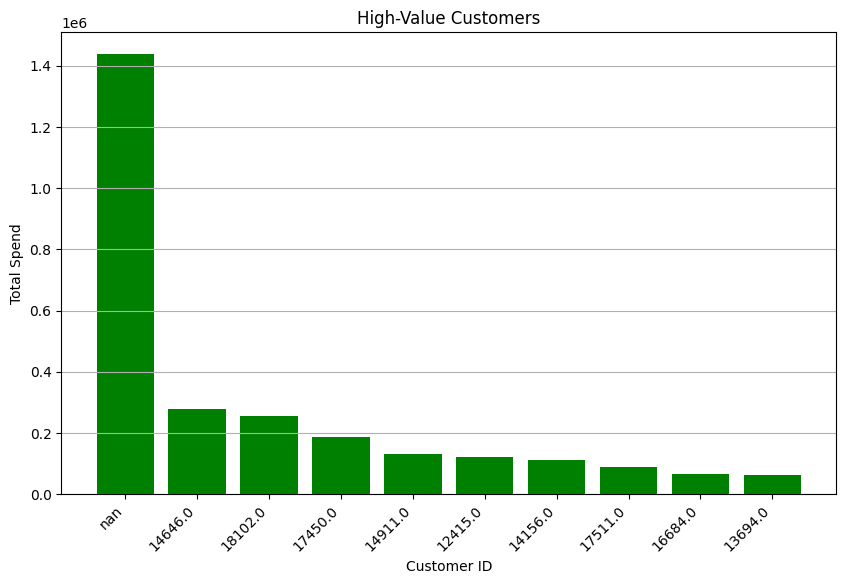

In [ ]:
# Load and visualize high-value customers
file_path = 'HighValueCustomersTop10_output.txt'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['CustomerID', 'TotalSpend'])

# Sort by total spend
data.sort_values(by='TotalSpend', ascending=False, inplace=True)

# Plot top 10 customers by total spend
plt.figure(figsize=(10, 6))
plt.bar(data['CustomerID'][:10].astype(str), data['TotalSpend'][:10], color='green')
plt.title('High-Value Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


**Peak Sales Hours**

In [ ]:
%%writefile PeakSalesHours.py
from mrjob.job import MRJob
import datetime

class PeakSalesHours(MRJob):

    def mapper(self, _, line):
        fields = line.split(',')

        try:
            # Extract necessary fields
            invoice_date = fields[4]  # Assuming 'InvoiceDate' is the 5th column
            quantity = int(fields[3])  # Assuming 'Quantity' is the 4th column
            price = float(fields[5])  # Assuming 'Price' is the 6th column

            # Calculate total sales
            total_sales = quantity * price

            # Extract hour from InvoiceDate
            hour = datetime.datetime.strptime(invoice_date, "%m/%d/%Y %H:%M").hour
            yield hour, total_sales
        except:
            pass  # Skip invalid rows

    def reducer(self, hour, sales):
        # Aggregate sales by hour
        yield hour, sum(sales)

if __name__ == '__main__':
    PeakSalesHours.run()


Overwriting PeakSalesHours.py


In [ ]:
!python PeakSalesHours.py /content/retail_data.csv > PeakSalesHours_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/PeakSalesHours.root.20241120.095937.412169
Running step 1 of 1...
job output is in /tmp/PeakSalesHours.root.20241120.095937.412169/output
Streaming final output from /tmp/PeakSalesHours.root.20241120.095937.412169/output...
Removing temp directory /tmp/PeakSalesHours.root.20241120.095937.412169...


In [ ]:
!cat PeakSalesHours_output.txt

10	1322473.3709999714
11	1142285.339999955
12	1355596.2599999015
13	1171229.3599999638
14	1090119.4910000043
18	140012.66000000096
19	46121.379999999874
20	15972.860000000026
6	-493.0999999999998
7	30596.279999999973
8	280958.29999999783
9	762972.9110000147
15	1182658.7899999411
16	725654.7000000444
17	433533.77100001916


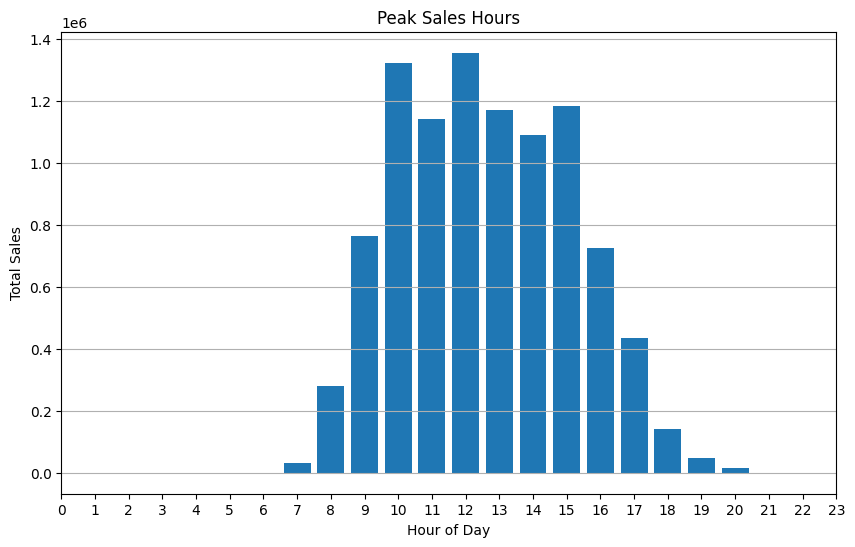

In [ ]:
# Load and visualize sales by hour
data = pd.read_csv('PeakSalesHours_output.txt', delimiter='\t', header=None, names=['Hour', 'Sales'])

# Convert hour to integer
data['Hour'] = data['Hour'].astype(int)

# Plot hourly sales
plt.figure(figsize=(10, 6))
plt.bar(data['Hour'], data['Sales'])
plt.title('Peak Sales Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


**Most Profitable Products**

In [ ]:
%%writefile MostProfitableProductsTop10.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class MostProfitableProductsTop10(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_calculate_revenue,
                   reducer=self.reducer_sum_revenue),
            MRStep(reducer=self.reducer_find_top_10)
        ]

    def mapper_calculate_revenue(self, _, line):
        fields = line.split(',')

        try:
            description = fields[2]  # Assuming 'Description' is the 3rd column
            quantity = int(fields[3])  # Assuming 'Quantity' is the 4th column
            price = float(fields[5])  # Assuming 'Price' is the 6th column

            revenue = quantity * price
            yield description, revenue
        except:
            pass  # Skip invalid rows

    def reducer_sum_revenue(self, product, revenues):
        # Aggregate revenue for each product
        yield None, (product, sum(revenues))

    def reducer_find_top_10(self, _, product_revenues):
        # Initialize a list to store the top 10 products
        top_10 = []

        for product, revenue in product_revenues:
            # Add the current product to the list
            top_10.append((product, revenue))

            # Use bubble sort to maintain the list in descending order by revenue
            for i in range(len(top_10) - 1, 0, -1):
                if top_10[i][1] > top_10[i - 1][1]:
                    # Swap elements
                    top_10[i], top_10[i - 1] = top_10[i - 1], top_10[i]

            # Keep only the top 10 items
            if len(top_10) > 10:
                top_10.pop()

        # Yield the top 10 products
        for product, revenue in top_10:
            yield product, revenue

if __name__ == '__main__':
    MostProfitableProductsTop10.run()


Writing MostProfitableProductsTop10.py


In [ ]:
!python MostProfitableProductsTop10.py /content/retail_data.csv >  MostProfitableProductsTop10_output.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/MostProfitableProductsTop10.root.20241120.100249.108234
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/MostProfitableProductsTop10.root.20241120.100249.108234/output
Streaming final output from /tmp/MostProfitableProductsTop10.root.20241120.100249.108234/output...
Removing temp directory /tmp/MostProfitableProductsTop10.root.20241120.100249.108234...


In [ ]:
!cat  MostProfitableProductsTop10_output.txt

"DOTCOM POSTAGE"	206245.48000000019
"REGENCY CAKESTAND 3 TIER"	164762.19
"WHITE HANGING HEART T-LIGHT HOLDER"	99668.46999999849
"PARTY BUNTING"	98302.98000000048
"JUMBO BAG RED RETROSPOT"	92356.03000000204
"RABBIT NIGHT LIGHT"	66756.59000000026
"POSTAGE"	66248.63999999997
"PAPER CHAIN KIT 50'S CHRISTMAS "	63791.93999999998
"ASSORTED COLOUR BIRD ORNAMENT"	58959.72999999952
"CHILLI LIGHTS"	53768.05999999997


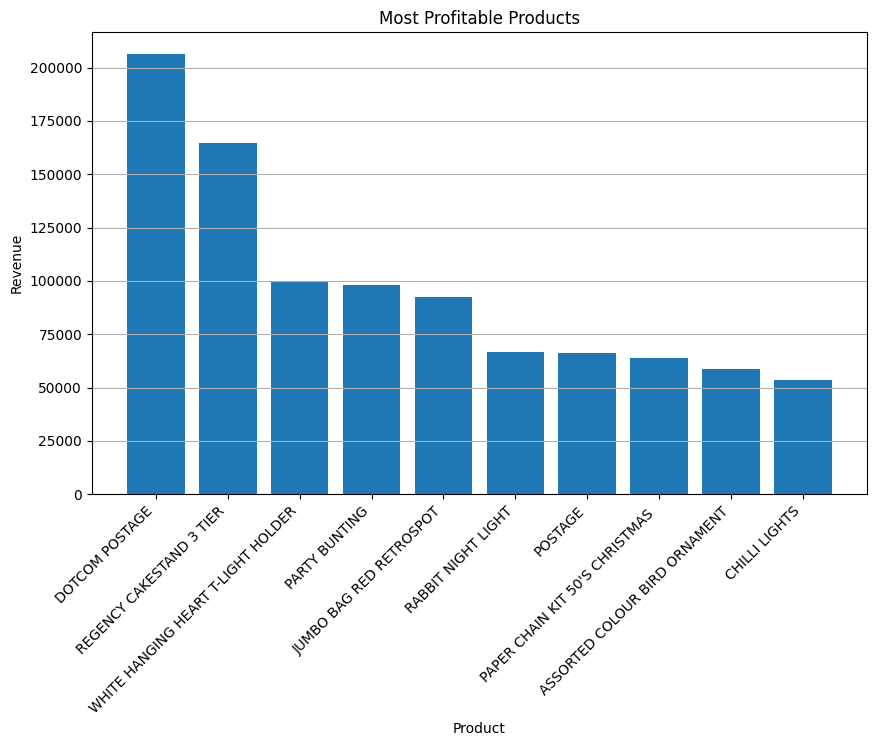

In [ ]:
# Load and visualize most profitable products
file_path = 'MostProfitableProductsTop10_output.txt'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['Product', 'Revenue'])

# Sort by revenue
data.sort_values(by='Revenue', ascending=False, inplace=True)

# Plot top 10 products by revenue
plt.figure(figsize=(10, 6))
plt.bar(data['Product'][:10], data['Revenue'][:10])
plt.title('Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()
